In [1]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345

# Classification 

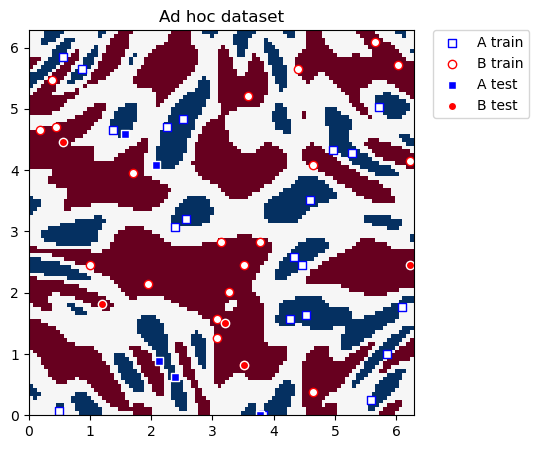

In [4]:
# Dataset 
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(training_size=20, test_size=5, n=adhoc_dimension, gap=0.3, plot_data=False, one_hot=False, include_sample_total=True,)

# Plotting the dataset
import matplotlib.pyplot as plt 
import numpy as np 

def plot_features(ax, features, labels, class_label, marker, face, edge, label): 
    # for training plot A: 
    ax.scatter(
        features[np.where(labels[:] == class_label), 0],
        features[np.where(labels[:] == class_label), 1], 
        marker=marker, facecolors=face, edgecolors=edge, label=label,)
    
def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):
    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()
    
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

## Defining the kernel

In [6]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler 
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

## Classification with SVC 

### Callable kernel function

In [8]:
from sklearn.svm import SVC

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_features, train_labels)
adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)
print(f"Callable kernel classification test score: {adhoc_score_callable_function}")

Callable kernel classification test score: 1.0


### Precomputed kernel matrix 

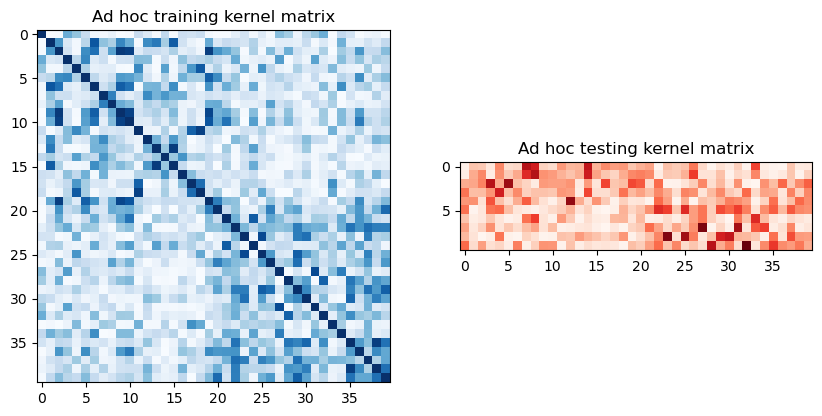

In [10]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues")
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [11]:
adhoc_svc = SVC(kernel="precomputed")
adhoc_svc.fit(adhoc_matrix_train, train_labels)
adhoc_score_precomputed_kernel = adhoc_svc.score(adhoc_matrix_test, test_labels)
print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")

Precomputed kernel classification test score: 1.0


## Classification with Quantum Support Vector Classification (QSVC)

In [12]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)
qsvc.fit(train_features, train_labels)
qsvc_score = qsvc.score(test_features, test_labels)
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 1.0


## Comparison of different classification models

In [13]:
print(f"Classification Model                    | Accuracy Score")
print(f"---------------------------------------------------------")
print(f"SVC using kernel as a callable function | {adhoc_score_callable_function:10.2f}")
print(f"SVC using precomputed kernel matrix     | {adhoc_score_precomputed_kernel:10.2f}")
print(f"QSVC                                    | {qsvc_score:10.2f}")

Classification Model                    | Accuracy Score
---------------------------------------------------------
SVC using kernel as a callable function |       1.00
SVC using precomputed kernel matrix     |       1.00
QSVC                                    |       1.00


# Clustering 

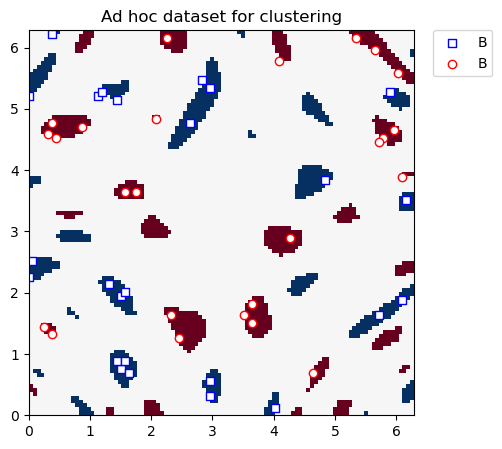

In [14]:
# Dataset
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(training_size=25, test_size=0, n=adhoc_dimension, gap=0.6, plot_data=False, one_hot=False, include_sample_total=True,)

# Plotting 
plt.figure(figsize = (5, 5))
plt.ylim(0, 2*np.pi)
plt.xlim(0, 2*np.pi)
plt.imshow(np.asmatrix(adhoc_total).T, interpolation="nearest", origin="lower", cmap="RdBu", extent=[0, 2*np.pi, 0, 2*np.pi],)

# A label plot
plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "B")

# B label plot
plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Ad hoc dataset for clustering")

plt.show()

## Defining the Kernel

In [15]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
adhoc_kernel = FidelityQuantumKernel(feature_map=adhoc_feature_map)

## Clustering with Spectral Clusturing Model

### Callable kernel function

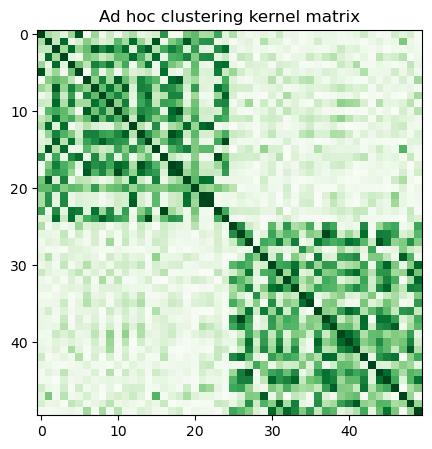

In [17]:
adhoc_matrix = adhoc_kernel.evaluate(x_vec=train_features)

plt.figure(figsize=(5,5))
plt.imshow(np.asmatrix(adhoc_matrix), interpolation="nearest", origin="upper", cmap="Greens")
plt.title("Ad hoc clustering kernel matrix")
plt.show()

### Precomputed kernel matrix

In [19]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

adhoc_spectral = SpectralClustering(2, affinity="precomputed")
cluster_labels = adhoc_spectral.fit_predict(adhoc_matrix)
cluster_score = normalized_mutual_info_score(cluster_labels, train_labels)
print(f"Clustering score: {cluster_score}")

Clustering score: 1.0


# Principle Component Analysis (PCA)

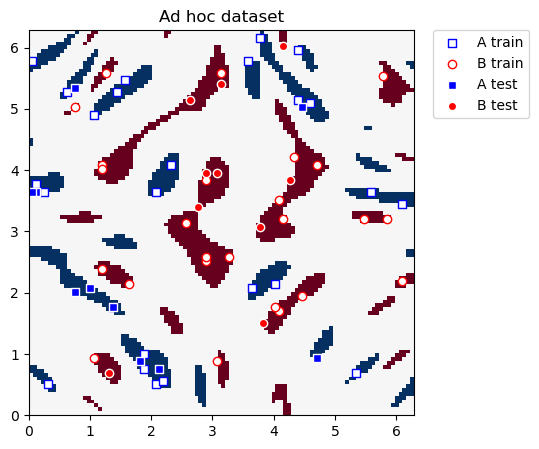

In [20]:
# dataset
adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(training_size=25, test_size=10, n=adhoc_dimension, gap=0.6, plot_data=False, one_hot=False, include_sample_total=True,)

# plotting
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

## Defining the kernel

In [21]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement="linear")
qpca_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

matrix_train = qpca_kernel.evaluate(x_vec=train_features)
matrix_test = qpca_kernel.evaluate(x_vec=test_features, y_vec=train_features)

## Comparison of Kernel PCA on gaussian and quantum kernel

In [24]:
from sklearn.decomposition import KernelPCA 

kernel_pca_rbf = KernelPCA(n_components=2, kernel="rbf") # gaussian
kernel_pca_rbf.fit(train_features)
train_features_rbf = kernel_pca_rbf.transform(train_features)
test_features_rbf = kernel_pca_rbf.transform(test_features)

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed") # quantum
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

### Implementing `logistic regression`

In [25]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, train_labels)
logistic_score = logistic_regression.score(test_features_q, test_labels)
print(f"Logistic regression score: {logistic_score}")

Logistic regression score: 1.0


## Post-processing

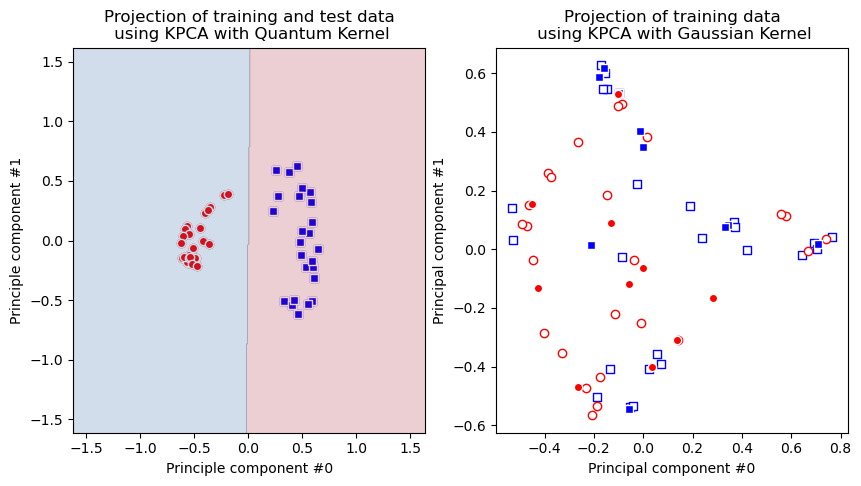

In [28]:
fig, (q_ax, rbf_ax) = plt.subplots(1, 2, figsize=(10,5))

# Quantum kernel plot
plot_features(q_ax, train_features_q, train_labels, 0, "s", "w", "b", "A train")
plot_features(q_ax, train_features_q, train_labels, 1, "o", "w", "r", "B train")

plot_features(q_ax, train_features_q, train_labels, 0, "s", "b", "w", "A test")
plot_features(q_ax, train_features_q, train_labels, 1, "o", "r", "w", "B test")

q_ax.set_ylabel("Principle component #1")
q_ax.set_xlabel("Principle component #0")
q_ax.set_title("Projection of training and test data\n using KPCA with Quantum Kernel")

h = 0.01 # step size

x_min, x_max = train_features_q[:, 0].min() - 1, train_features_q[:, 0].max() + 1
y_min, y_max = train_features_q[:, 1].min() - 1, train_features_q[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])

# Gaussian kernel plot

predictions = predictions.reshape(xx.shape)
q_ax.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.2)

plot_features(rbf_ax, train_features_rbf, train_labels, 0, "s", "w", "b", "A train")
plot_features(rbf_ax, train_features_rbf, train_labels, 1, "o", "w", "r", "B train")
plot_features(rbf_ax, test_features_rbf, test_labels, 0, "s", "b", "w", "A test")
plot_features(rbf_ax, test_features_rbf, test_labels, 1, "o", "r", "w", "A test")

rbf_ax.set_ylabel("Principal component #1")
rbf_ax.set_xlabel("Principal component #0")
rbf_ax.set_title("Projection of training data\n using KPCA with Gaussian Kernel")

plt.show()